In [154]:
path = "../data/hfailure_clinical_records_dataset.csv"

In [224]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.animation as animation
from IPython.core.display import HTML

In [156]:
hf=pd.read_csv(path)
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [157]:
# Renaming creatinine_phosphokinase
hf["CPK"] = hf["creatinine_phosphokinase"]
hf = hf.drop("creatinine_phosphokinase", axis=1)

In [158]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

In [159]:
hf.platelets = hf.platelets/1000

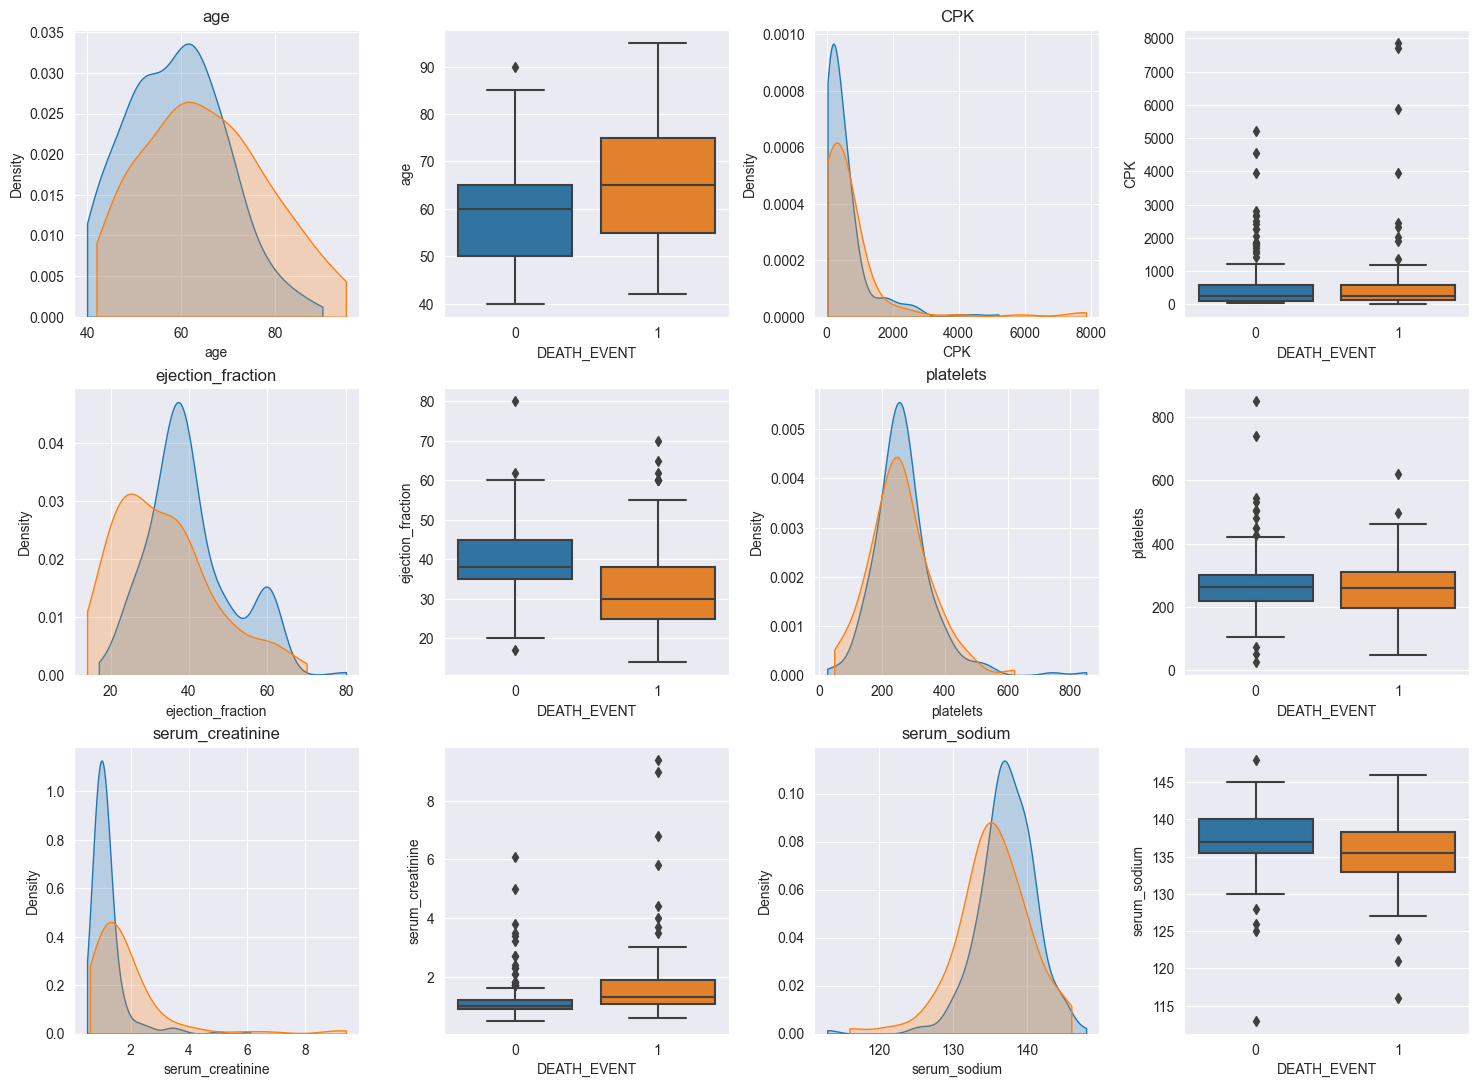

In [160]:
plt.figure(figsize=(18, 27))
warnings.filterwarnings('ignore')
for index, column in enumerate(numerical_features):
    plt.subplot(6, 4, index*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)

    plt.grid(True)
    plt.title(column)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, column], label="alive", shade=True, kernel='gau', cut=0)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, column], label="dead", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, index*2+2)
    sns.boxplot(y = column, data = hf, x="DEATH_EVENT")

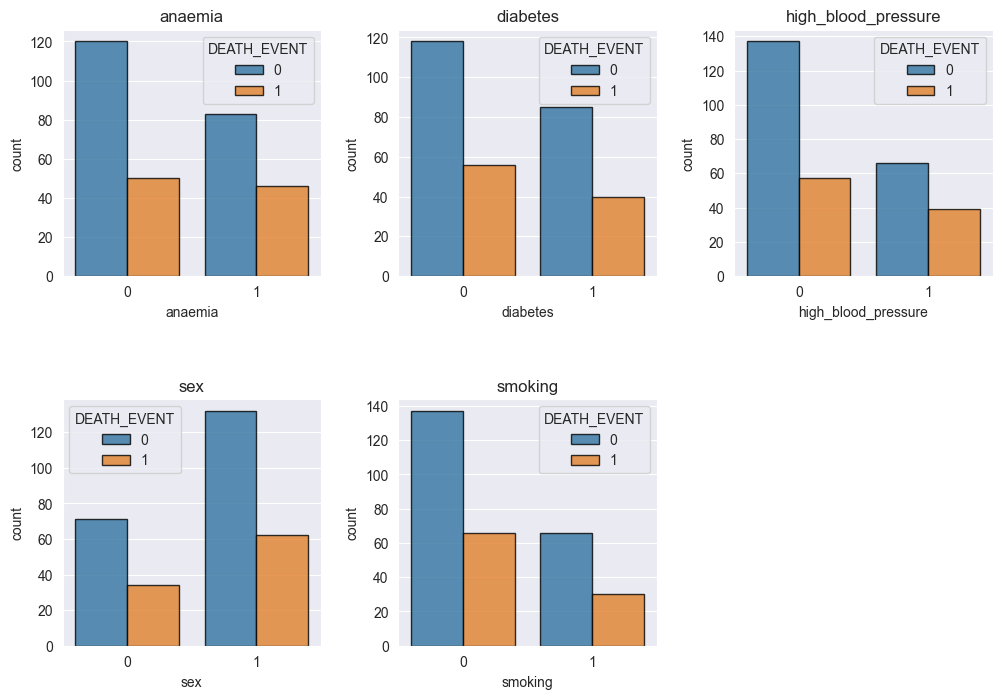

In [161]:
plt.figure(figsize=(12, 8))
warnings.filterwarnings('ignore')
for index, column in enumerate(categorical_features):
    plt.subplot(2, 3, index+1)
    plt.title(column)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=column, hue="DEATH_EVENT", alpha=0.8, edgecolor="black", linewidth=1)

In [162]:
hf_norm = hf.copy()
all_features = categorical_features.copy()
all_features.extend(numerical_features)

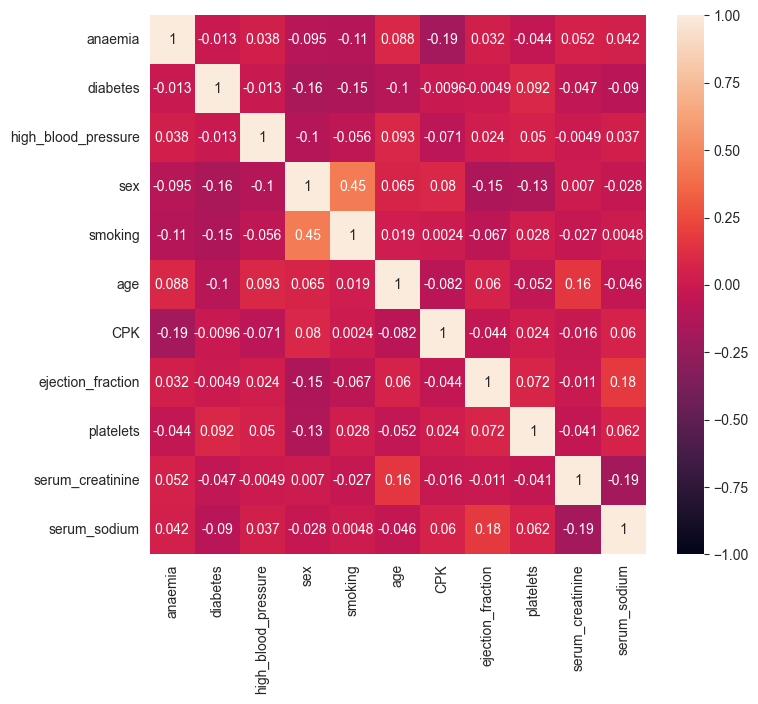

In [163]:
plt.figure(figsize=(8, 7))
sns.heatmap(hf_norm[all_features].corr(), vmin=-1, vmax=1, annot=True);

In [164]:
hist_data =[hf["age"].values]
group_labels = ['age']

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [165]:
male = hf[hf["sex"]==1]
female = hf[hf["sex"]==0]

male_survi = male[hf["DEATH_EVENT"]==0]
male_not = male[hf["DEATH_EVENT"]==1]
female_survi = female[hf["DEATH_EVENT"]==0]
female_not = female[hf["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[hf["DEATH_EVENT"]==0]),len(male[hf["DEATH_EVENT"]==1]),
          len(female[hf["DEATH_EVENT"]==0]),len(female[hf["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

In [167]:
surv = hf[hf["DEATH_EVENT"]==0]["age"]
not_surv = hf[hf["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

In [168]:
surv = hf[hf['DEATH_EVENT']==0]['serum_sodium']
not_surv = hf[hf['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [169]:
surv = hf[hf['DEATH_EVENT']==0]['serum_creatinine']
not_surv = hf[hf['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

In [170]:
surv = hf[hf['DEATH_EVENT']==0]['ejection_fraction']
not_surv = hf[hf['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

In [173]:
diabetes_yes = hf[hf['diabetes']==1]
diabetes_no = hf[hf['diabetes']==0]
diabetes_yes_survi = diabetes_yes[hf["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[hf["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[hf["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[hf["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[hf["DEATH_EVENT"]==0]),len(diabetes_yes[hf["DEATH_EVENT"]==1]),
          len(diabetes_no[hf["DEATH_EVENT"]==0]),len(diabetes_no[hf["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()

In [174]:
anaemia_yes = hf[hf['anaemia']==1]
anaemia_no = hf[hf['anaemia']==0]

anaemia_yes_survi = anaemia_yes[hf["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[hf["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[hf["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[hf["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[hf["DEATH_EVENT"]==0]),len(anaemia_yes[hf["DEATH_EVENT"]==1]),
          len(anaemia_no[hf["DEATH_EVENT"]==0]),len(anaemia_no[hf["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

In [175]:
hbp_yes = hf[hf['high_blood_pressure']==1]
hbp_no = hf[hf['high_blood_pressure']==0]

hbp_yes_survi = hbp_yes[hf["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[hf["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[hf["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[hf["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[hf["DEATH_EVENT"]==0]),len(hbp_yes[hf["DEATH_EVENT"]==1]),
          len(hbp_no[hf["DEATH_EVENT"]==0]),len(hbp_no[hf["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

In [177]:
smoking_yes = hf[hf['smoking']==1]
smoking_no = hf[hf['smoking']==0]

smoking_yes_survi = smoking_yes[hf["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[hf["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[hf["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[hf["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[hf["DEATH_EVENT"]==0]),len(smoking_yes[hf["DEATH_EVENT"]==1]),
          len(smoking_no[hf["DEATH_EVENT"]==0]),len(smoking_no[hf["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

In [179]:
Features = ['time','ejection_fraction','serum_creatinine']
x = hf[Features]
y = hf["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [185]:
# logistic regression
accuracy_list=[]
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


In [186]:
# Split data into X and y
X = hf.drop("DEATH_EVENT", axis=1)

y = hf["DEATH_EVENT"]

In [187]:
X

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,CPK
0,75.0,0,0,20,1,265.00000,1.9,130,1,0,4,582
1,55.0,0,0,38,0,263.35803,1.1,136,1,0,6,7861
2,65.0,0,0,20,0,162.00000,1.3,129,1,1,7,146
3,50.0,1,0,20,0,210.00000,1.9,137,1,0,7,111
4,65.0,1,1,20,0,327.00000,2.7,116,0,0,8,160
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,155.00000,1.1,143,1,1,270,61
295,55.0,0,0,38,0,270.00000,1.2,139,0,0,271,1820
296,45.0,0,1,60,0,742.00000,0.8,138,0,0,278,2060
297,45.0,0,0,38,0,140.00000,1.4,140,1,1,280,2413


In [188]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [189]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [190]:
X_train

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,CPK
6,75.000,1,0,15,0,127.00000,1.20,137,1,0,10,246
183,75.000,0,0,38,1,224.00000,2.50,134,1,0,162,99
185,60.667,1,1,30,0,389.00000,1.50,136,1,0,171,104
146,52.000,0,0,30,0,218.00000,0.70,136,1,1,112,132
30,94.000,0,1,38,1,263.35803,1.83,134,1,0,27,582
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,1,40,1,201.00000,1.00,136,0,0,172,151
71,58.000,0,1,35,0,122.00000,0.90,139,1,1,71,582
106,55.000,0,0,45,0,263.00000,1.30,137,1,0,88,748
270,44.000,0,1,30,1,263.35803,1.60,130,1,1,244,582


In [191]:
y_train, len(y_train)

(6      1
 183    1
 185    1
 146    0
 30     1
       ..
 188    0
 71     0
 106    0
 270    0
 102    0
 Name: DEATH_EVENT, Length: 239, dtype: int64,
 239)

In [220]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Booster": GradientBoostingClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

NameError: name 'lightgbm' is not defined

In [218]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8,
 'KNN': 0.6333333333333333,
 'Random Forest': 0.7,
 'Linear Regression': 0.2648262172713157,
 'Gradient Booster': 0.7333333333333333}

Accuracy of Gradient Boosting is :  51.67%
